In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV, StratifiedKFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score
from sklearn.metrics import r2_score, roc_auc_score, roc_curve, classification_report

import warnings
warnings.filterwarnings("ignore")


In [4]:
train_df = pd.read_csv('../data/raw/fashion-mnist_train.csv', header = 0)
test_df = pd.read_csv('../data/raw/fashion-mnist_test.csv', header = 0)

In [5]:
print(f'Training dataframe shape: {train_df.shape}')
print(f'Test dataframe shape: {test_df.shape}')

Training dataframe shape: (60000, 785)
Test dataframe shape: (10000, 785)


In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 785 entries, label to pixel784
dtypes: int64(785)
memory usage: 359.3 MB


In [7]:
train_df.describe()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
count,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,...,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.00000
mean,4.500000,0.000900,0.006150,0.035333,0.101933,0.247967,0.411467,0.805767,2.198283,5.682000,...,34.625400,23.300683,16.588267,17.869433,22.814817,17.911483,8.520633,2.753300,0.855517,0.07025
std,2.872305,0.094689,0.271011,1.222324,2.452871,4.306912,5.836188,8.215169,14.093378,23.819481,...,57.545242,48.854427,41.979611,43.966032,51.830477,45.149388,29.614859,17.397652,9.356960,2.12587
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,4.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,58.000000,9.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
max,9.000000,16.000000,36.000000,226.000000,164.000000,227.000000,230.000000,224.000000,255.000000,254.000000,...,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,170.00000


In [8]:
train_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
#creating the labels

labels = {
            0 : "T-shirt/top",
            1 : "Trouser", 
            2 : "Pullover", 
            3 : "Dress", 
            4 : "Coat", 
            5 : "Sandal", 
            6 : "Shirt", 
            7 : "Sneaker", 
            8 : "Bag", 
            9 : "Ankle boot"
        }

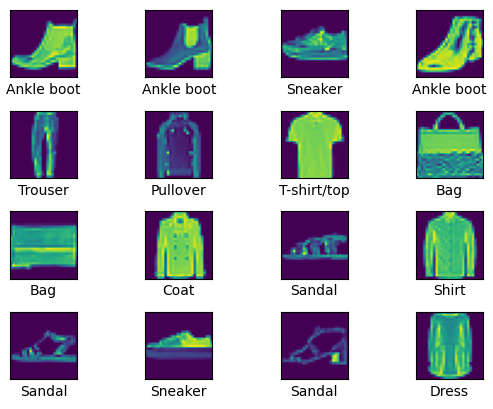

In [10]:
#visualizing the data

for i in range(16):
    k = np.random.randint(train_df.shape[0])
    plt.subplot(4, 4, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_df.iloc[k][1:].values.reshape(28,28))
    plt.xlabel(labels.get(train_df.iloc[k][0]))
plt.subplots_adjust(wspace=0.5, hspace=0.5)
plt.show()

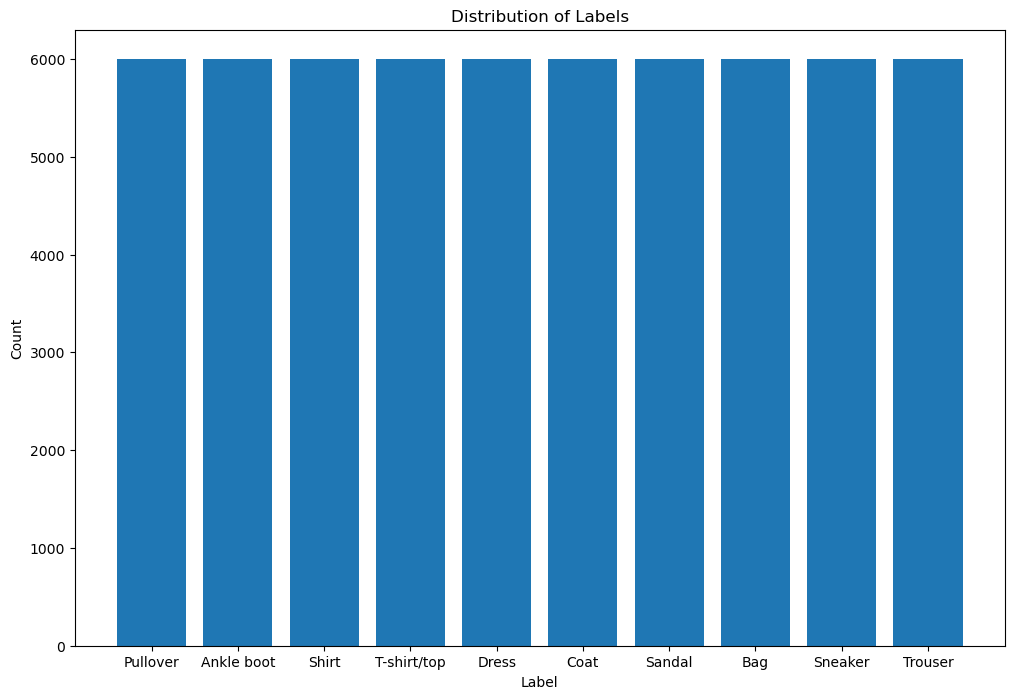

In [11]:
label_counts = train_df['label'].value_counts()

label_names = [labels[x] for x in label_counts.index]

plt.figure(figsize=(12,8))
plt.bar(label_names, label_counts)
plt.xlabel('Label')
plt.ylabel('Count')
plt.title('Distribution of Labels')
plt.show()

Normalization

In [12]:
train_labels = train_df.pop('label')

train_labels.shape

(60000,)

In [13]:
#creating MinMax scaler for range normalization

scaler = MinMaxScaler()
normalized_df = scaler.fit_transform(train_df)

In [14]:
normalized_df = pd.DataFrame(data=normalized_df, index = train_df.index, columns=train_df.columns)

normalized_df.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.019608,0.0,0.0,...,0.000000,0.0,0.0,0.117647,0.168627,0.000000,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.006098,0.008811,0.0,0.0,0.000000,0.0,0.0,...,0.011765,0.0,0.0,0.000000,0.000000,0.003922,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0


Principal Componenet Analysis

In [15]:
#Principal componenet analysis with principal componenets 3

pca = PCA(n_components=3)
pca_result = pca.fit_transform(normalized_df.values)

print('Explained variation for principal components: {}'.format(pca.explained_variance_ratio_))

Explained variation for principal components: [0.29004421 0.17724732 0.0602206 ]


In [16]:
pca.components_.shape

(3, 784)

###### From the above, we can see that the first component can retain maximum variance of 29%, followed by components at 17.7% and 6% respectively.

Text(0.5, 0.98, '3-Component PCA')

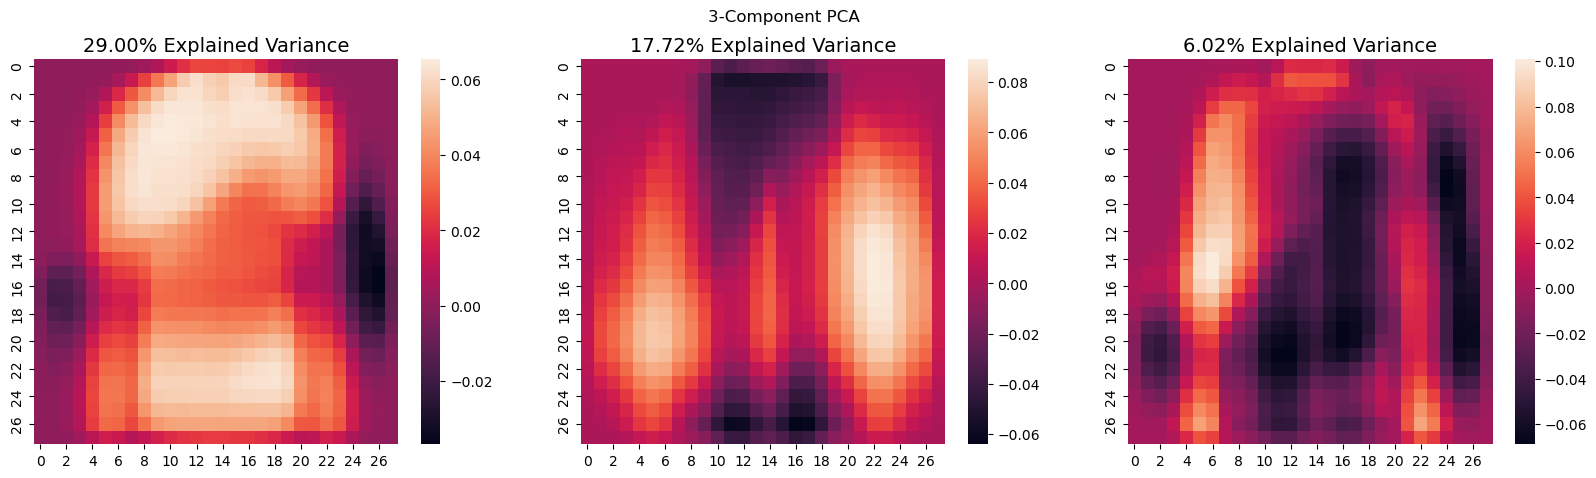

In [17]:
fig, axarr = plt.subplots(1, 3, figsize=(20, 5))

sns.heatmap(pca.components_[0, :].reshape(28, 28), ax=axarr[0])
sns.heatmap(pca.components_[1, :].reshape(28, 28), ax=axarr[1])
sns.heatmap(pca.components_[2, :].reshape(28, 28), ax=axarr[2])


axarr[0].set_title(
    "{0:.2f}% Explained Variance".format(pca.explained_variance_ratio_[0]*100), fontsize=14)
axarr[1].set_title(
    "{0:.2f}% Explained Variance".format(pca.explained_variance_ratio_[1]*100), fontsize=14)
axarr[2].set_title(
    "{0:.2f}% Explained Variance".format(pca.explained_variance_ratio_[2]*100), fontsize=14)

plt.suptitle('3-Component PCA')

In [18]:
pca = PCA(n_components=784, random_state=42)
pca_784 = pca.fit_transform(normalized_df.values)

var_ratios = np.cumsum(pca.explained_variance_ratio_)

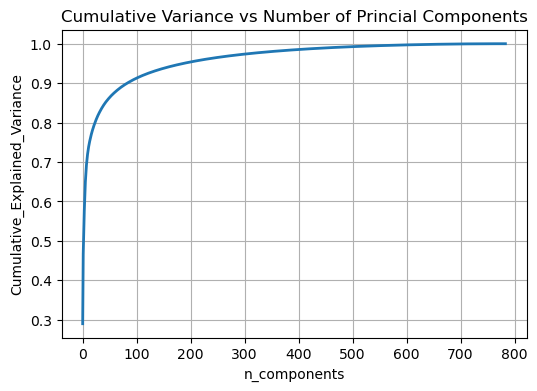

In [19]:
plt.figure(figsize=(6, 4))
plt.plot(var_ratios, linewidth=2)
plt.xlabel("n_components")
plt.ylabel("Cumulative_Explained_Variance")
plt.title("Cumulative Variance vs Number of Princial Components")
plt.grid()
plt.show()

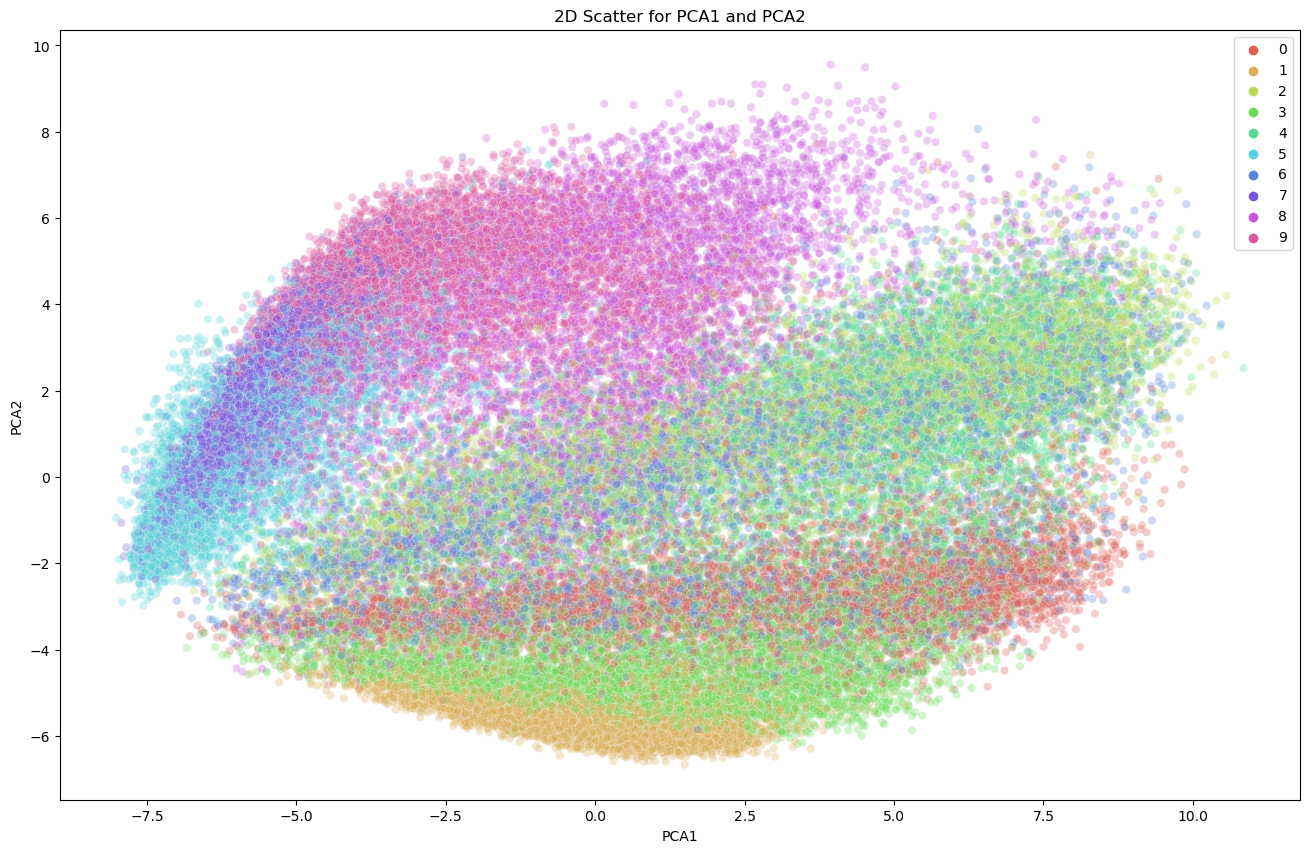

In [21]:
#2D Scatter from PCA

plt.figure(figsize=(16,10))

sns.scatterplot(
    x = pca_result[:, 0], 
    y = pca_result[:, 1],
    hue = train_labels.values,
    hue_order = labels,
    palette=sns.color_palette("hls", 10),
    legend="full",
    alpha=0.3
)

plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.title('2D Scatter for PCA1 and PCA2')
plt.show()

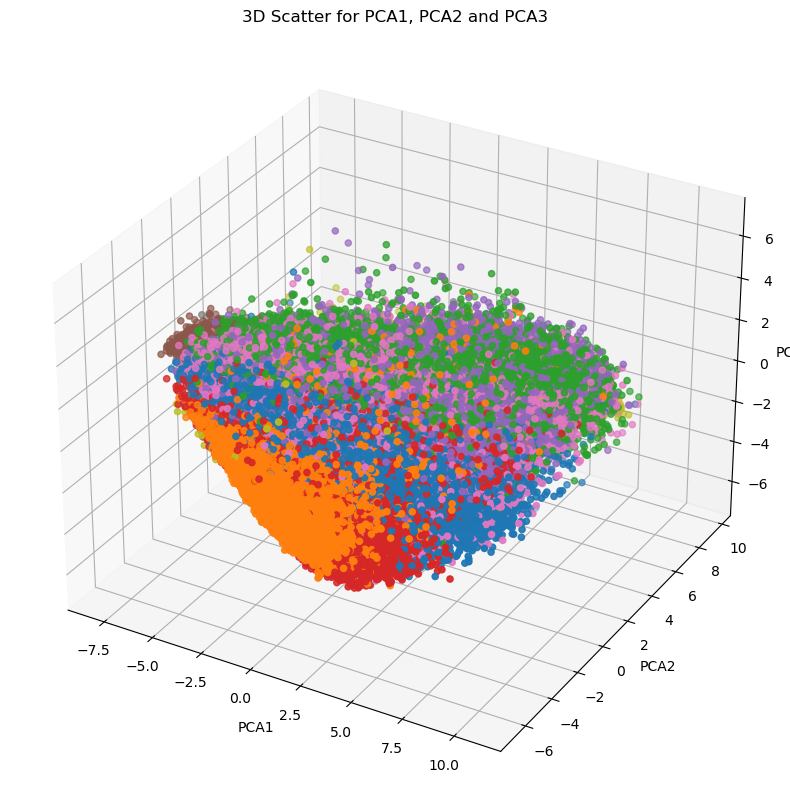

In [22]:
fig = plt.figure(figsize=(16,10))
graph = fig.add_subplot(111, projection = '3d')
graph.scatter(
    xs = pca_result[:, 0], 
    ys = pca_result[:, 1], 
    zs = pca_result[:, 2], 
    c = train_labels.values, 
    cmap='tab10'
)
graph.set_xlabel('PCA1')
graph.set_ylabel('PCA2')
graph.set_zlabel('PCA3')
graph.title.set_text("3D Scatter for PCA1, PCA2 and PCA3")
plt.show()

In [23]:
pca = PCA(n_components=150, random_state=42)
train_pca_150 = pca.fit_transform(normalized_df.values)

In [24]:
#normalizing and PCA of test set

test_labels = test_df.pop('label')
test_normalized = scaler.transform(test_df)
test_pca_150 = pca.transform(test_normalized)

In [25]:
columns = ['PCA' + str(i) for i in range(1, train_pca_150.shape[1]+1)]

train_pca_df = pd.DataFrame(data = train_pca_150, columns = columns, index = train_df.index)
test_pca_df = pd.DataFrame(data = test_pca_150, columns = columns, index = test_df.index)

train_pca_df = pd.concat([train_pca_df, train_labels], axis=1)
test_pca_df = pd.concat([test_pca_df, test_labels], axis=1)

Model Training

In [26]:
y_train = train_pca_df.pop('label').values
y_test = test_pca_df.pop('label').values

X_train = train_pca_df.values
X_test = test_pca_df.values

### Hyperparameter Selection:

#### Logistic Regression

In [24]:
param_grid = {'C' : np.logspace(-1,2,4), 'penalty' : ["l1", "l2"]}

log_reg = LogisticRegression()
log_reg_cv = GridSearchCV(log_reg, param_grid, cv = 5, verbose=1)
log_reg_cv.fit(X_train, y_train)

print(f"Logistic Regression - best parameters: {log_reg_cv.best_params_}")

Fitting 5 folds for each of 8 candidates, totalling 40 fits


Logistic Regression - best parameters: {'C': 1.0, 'penalty': 'l2'}


#### Support Vector Machines

In [25]:
param_grid = {  'kernel' : ['rbf', 'poly'],
                'C' : np.logspace(-1,1,3)
            }

svc_clf = SVC()
svc_clf.fit(X_train, y_train)

svc_clf_cv = GridSearchCV(svc_clf, param_grid, cv=3, verbose=1)
svc_clf_cv.fit(X_train, y_train)

print(f"Support Vector Machine - best parameters: {svc_clf_cv.best_params_}")

Fitting 3 folds for each of 6 candidates, totalling 18 fits
Support Vector Machine - best parameters: {'C': 10.0, 'kernel': 'rbf'}


#### Random Forest Classifier

In [26]:
param_grid = {'n_estimators': [300, 500],
              'criterion':['gini', 'entropy']}

rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

rfc_cv = GridSearchCV(rfc, param_grid, cv=3, verbose=2)
rfc_cv.fit(X_train, y_train)

print(f"Random Forest Classifier - best parameters: {rfc_cv.best_params_}")

Fitting 3 folds for each of 4 candidates, totalling 12 fits
[CV] END ...................criterion=gini, n_estimators=300; total time= 4.3min
[CV] END ...................criterion=gini, n_estimators=300; total time= 4.4min
[CV] END ...................criterion=gini, n_estimators=300; total time= 4.3min
[CV] END ...................criterion=gini, n_estimators=500; total time= 7.4min
[CV] END ...................criterion=gini, n_estimators=500; total time= 7.4min
[CV] END ...................criterion=gini, n_estimators=500; total time= 7.3min
[CV] END ................criterion=entropy, n_estimators=300; total time= 7.1min
[CV] END ................criterion=entropy, n_estimators=300; total time= 7.0min
[CV] END ................criterion=entropy, n_estimators=300; total time= 7.2min
[CV] END ................criterion=entropy, n_estimators=500; total time=11.0min
[CV] END ................criterion=entropy, n_estimators=500; total time=11.5min
[CV] END ................criterion=entropy, n_est

### Model Training:

#### Logistic Regression

In [27]:
logistic = LogisticRegression(max_iter=200, solver="liblinear", penalty="l2", C=1)
logistic.fit(X_train, y_train)

LogisticRegression(C=1, max_iter=200, solver='liblinear')

#### Support Vector Machine

In [28]:
svc = SVC(kernel="rbf", C=10, gamma="auto", probability=True)
svc.fit(X_train, y_train)

SVC(C=10, gamma='auto', probability=True)

#### XGboost

In [29]:
xgb = XGBClassifier(n_estimators = 300, eval_metric="merror", objective="multi:softmax", eta = 0.1)
xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eta=0.1, eval_metric='merror',
              feature_types=None, gamma=None, gpu_id=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, n_estimators=300, n_jobs=None,
              num_parallel_tree=None, objective='multi:softmax', ...)

#### Random Forest Classifier

In [30]:
rfc = RandomForestClassifier(n_estimators=500, criterion='entropy')
rfc.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=500)

### Model Evaluation

In [29]:
skfold = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

In [31]:
y_train_logistic = logistic.predict(X_train)
y_pred_logistic = logistic.predict(X_test)

In [ ]:
logistic_accuracy = cross_val_score(logistic, X_train, y_train, cv=skfold, scoring = 'accuracy')
logistic_precision = cross_val_score(logistic, X_train, y_train, cv=skfold, scoring = 'precision_micro')
logistic_recall = cross_val_score(logistic, X_train, y_train, cv=skfold, scoring = 'recall_micro')

print(f"Cross Validation Logistic Accuracy Score: {logistic_accuracy.mean()}")
print(f"Cross Validation Logistic Precision Score: {logistic_precision.mean()}")
print(f"Cross Validation Logistic Recall Score: {logistic_recall.mean()}")

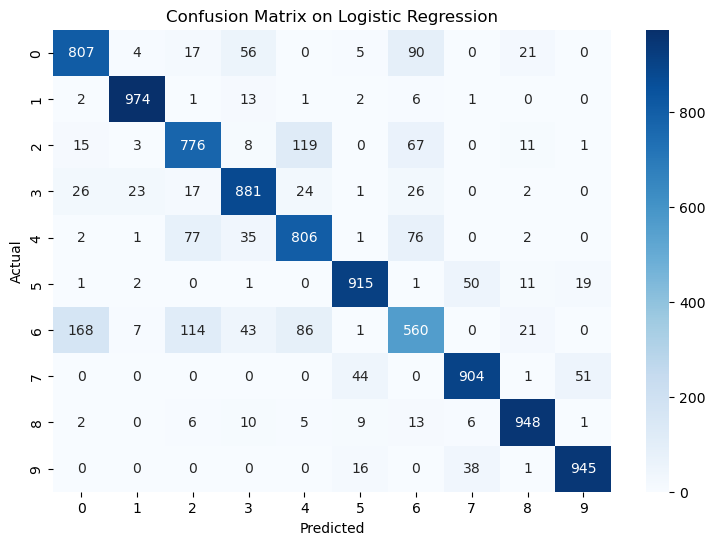

In [32]:
con_matrix = pd.crosstab(pd.Series(y_test.flatten(), name='Actual'), pd.Series(y_pred_logistic, name='Predicted'))
plt.figure(figsize=(9,6))
plt.title("Confusion Matrix on Logistic Regression")
sns.heatmap(con_matrix, cmap="Blues", annot=True, fmt='g')
plt.show()

In [33]:
logistic_train_accuracy = accuracy_score(y_train, y_train_logistic)
logistic_test_accuracy = accuracy_score(y_test, y_pred_logistic)

print(f"Train Accuracy score: {logistic_train_accuracy}")
print(f"Test Accuracy score: {logistic_test_accuracy}")
print(f"Logistic Classification Report:\n {classification_report(y_test, y_pred_logistic)}")

Train Accuracy score: 0.8547
Test Accuracy score: 0.8516
Logistic Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.81      0.80      1000
           1       0.96      0.97      0.97      1000
           2       0.77      0.78      0.77      1000
           3       0.84      0.88      0.86      1000
           4       0.77      0.81      0.79      1000
           5       0.92      0.92      0.92      1000
           6       0.67      0.56      0.61      1000
           7       0.90      0.90      0.90      1000
           8       0.93      0.95      0.94      1000
           9       0.93      0.94      0.94      1000

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000



In [34]:
y_train_SVC = svc.predict(X_train)
y_pred_SVC = svc.predict(X_test)

In [ ]:
svc_accuracy = cross_val_score(svc, X_train, y_train, cv=skfold, scoring = 'accuracy')
svc_precision = cross_val_score(svc, X_train, y_train, cv=skfold, scoring = 'precision_micro')
svc_recall = cross_val_score(svc, X_train, y_train, cv=skfold, scoring = 'recall_micro')

print(f"Cross Validation SVC Accuracy Score: {svc_accuracy.mean()}")
print(f"Cross Validation SVC Precision Score: {svc_precision.mean()}")
print(f"Cross Validation SVC Recall Score: {svc_recall.mean()}")

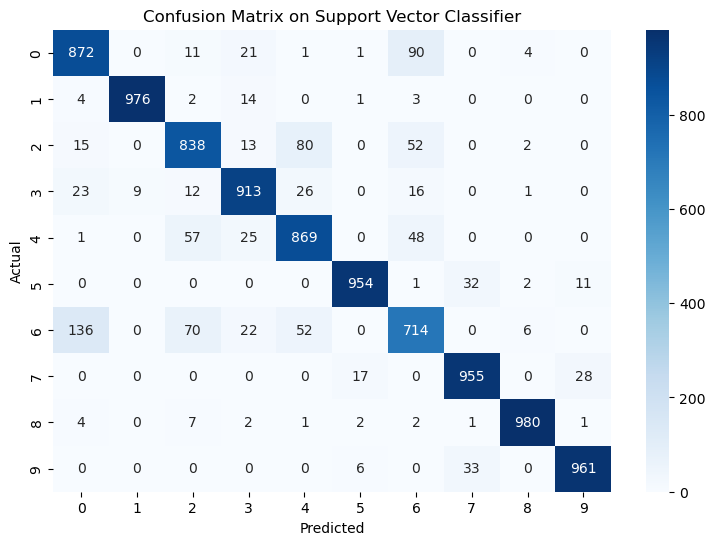

In [35]:
con_matrix = pd.crosstab(pd.Series(y_test.flatten(), name='Actual'), pd.Series(y_pred_SVC, name='Predicted'))
plt.figure(figsize=(9,6))
plt.title("Confusion Matrix on Support Vector Classifier")
sns.heatmap(con_matrix, cmap="Blues", annot=True, fmt='g')
plt.show()

In [36]:
SVC_train_accuracy = accuracy_score(y_train, y_train_SVC)
SVC_test_accuracy = accuracy_score(y_test, y_pred_SVC)

print(f"Train Accuracy score: {SVC_train_accuracy}")
print(f"Test Accuracy score: {SVC_test_accuracy}")
print(f"Support Vector Classification Report:\n {classification_report(y_test, y_pred_SVC)}")

Train Accuracy score: 0.9302333333333334
Test Accuracy score: 0.9032
Support Vector Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.87      0.85      1000
           1       0.99      0.98      0.98      1000
           2       0.84      0.84      0.84      1000
           3       0.90      0.91      0.91      1000
           4       0.84      0.87      0.86      1000
           5       0.97      0.95      0.96      1000
           6       0.77      0.71      0.74      1000
           7       0.94      0.95      0.95      1000
           8       0.98      0.98      0.98      1000
           9       0.96      0.96      0.96      1000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



In [37]:
y_train_XGB = xgb.predict(X_train)
y_pred_XGB = xgb.predict(X_test)

In [ ]:
xgb_accuracy = cross_val_score(xgb, X_train, y_train, cv=skfold, scoring = 'accuracy')
xgb_precision = cross_val_score(xgb, X_train, y_train, cv=skfold, scoring = 'precision_micro')
xgb_recall = cross_val_score(xgb, X_train, y_train, cv=skfold, scoring = 'recall_micro')

print(f"Cross Validation XGboost Accuracy Score: {xgb_accuracy.mean()}")
print(f"Cross Validation XGboost Precision Score: {xgb_precision.mean()}")
print(f"Cross Validation XGboost Recall Score: {xgb_recall.mean()}")

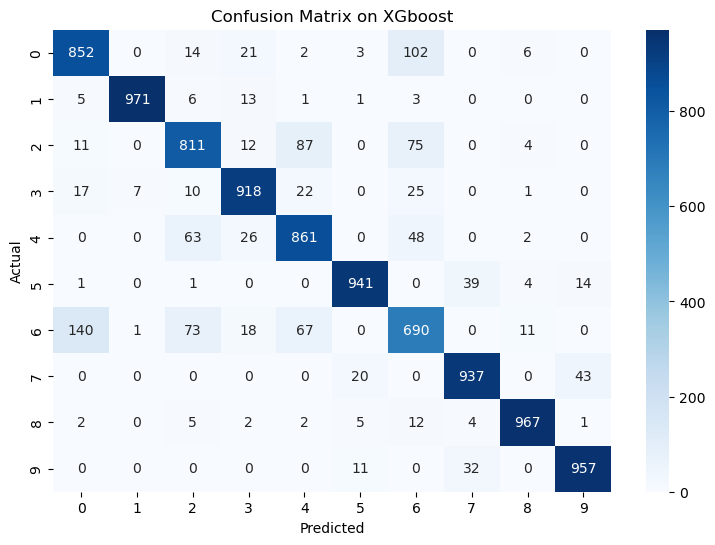

In [38]:
con_matrix = pd.crosstab(pd.Series(y_test.flatten(), name='Actual'), pd.Series(y_pred_XGB, name='Predicted'))
plt.figure(figsize=(9,6))
plt.title("Confusion Matrix on XGboost")
sns.heatmap(con_matrix, cmap="Blues", annot=True, fmt='g')
plt.show()

In [39]:
XGB_train_accuracy = accuracy_score(y_train, y_train_XGB)
XGB_test_accuracy = accuracy_score(y_test, y_pred_XGB)

print(f"Train Accuracy score: {XGB_train_accuracy}")
print(f"Test Accuracy score: {XGB_test_accuracy}")
print(f"XGboost Classification Report:\n {classification_report(y_test, y_pred_XGB)}")

Train Accuracy score: 0.9988666666666667
Test Accuracy score: 0.8905
XGboost Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.85      0.84      1000
           1       0.99      0.97      0.98      1000
           2       0.83      0.81      0.82      1000
           3       0.91      0.92      0.91      1000
           4       0.83      0.86      0.84      1000
           5       0.96      0.94      0.95      1000
           6       0.72      0.69      0.71      1000
           7       0.93      0.94      0.93      1000
           8       0.97      0.97      0.97      1000
           9       0.94      0.96      0.95      1000

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



In [40]:
y_train_rfc = rfc.predict(X_train)
y_pred_rfc = rfc.predict(X_test)

In [ ]:
rfc_accuracy = cross_val_score(rfc, X_train, y_train, cv=skfold, scoring = 'accuracy')
rfc_precision = cross_val_score(rfc, X_train, y_train, cv=skfold, scoring = 'precision_micro')
rfc_recall = cross_val_score(rfc, X_train, y_train, cv=skfold, scoring = 'recall_micro')

print(f"Cross Validation Random Forest Classifier Accuracy Score: {rfc_accuracy.mean()}")
print(f"Cross Validation Random Forest Classifier Precision Score: {rfc_precision.mean()}")
print(f"Cross Validation Random Forest Classifier Recall Score: {rfc_recall.mean()}")

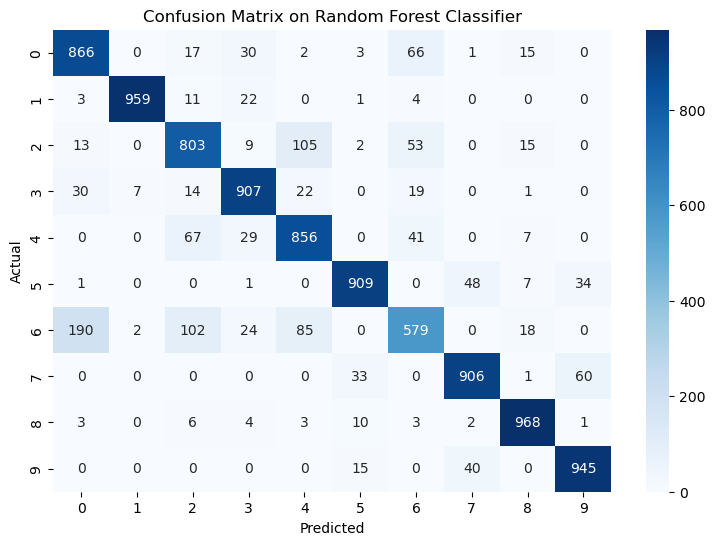

In [41]:
con_matrix = pd.crosstab(pd.Series(y_test.flatten(), name='Actual'), pd.Series(y_pred_rfc, name='Predicted'))
plt.figure(figsize=(9,6))
plt.title("Confusion Matrix on Random Forest Classifier")
sns.heatmap(con_matrix, cmap="Blues", annot=True, fmt='g')
plt.show()

In [43]:
rfc_train_accuracy = accuracy_score(y_train, y_train_rfc)
rfc_test_accuracy = accuracy_score(y_test, y_pred_rfc)

print(f"Train Accuracy score: {rfc_train_accuracy}")
print(f"Test Accuracy score: {rfc_test_accuracy}")
print(f"Random Forest Classification Report:\n {classification_report(y_test, y_pred_XGB)}")

Train Accuracy score: 1.0
Test Accuracy score: 0.8698
Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.85      0.84      1000
           1       0.99      0.97      0.98      1000
           2       0.83      0.81      0.82      1000
           3       0.91      0.92      0.91      1000
           4       0.83      0.86      0.84      1000
           5       0.96      0.94      0.95      1000
           6       0.72      0.69      0.71      1000
           7       0.93      0.94      0.93      1000
           8       0.97      0.97      0.97      1000
           9       0.94      0.96      0.95      1000

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000

